# Python for DeepLearning

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jihoon/anaconda3/envs/py385/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/jihoon/anaconda3/envs/py385/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩. 0, 1, 2는 패딩, 문서 시작, 사전에 없음을 위한 인덱스이브로 3을 뺌
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고, 모든 원소가 0인 행렬을 만듬.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환

x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환


In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 2021.03.12

### ch 3.4.3

#### code 3-3 ~ 3-6

In [12]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### ch 3.4.4 - Verification Training

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 23ms/step - loss: 0.5978 - accuracy: 0.6857 - val_loss: 0.4451 - val_accuracy: 0.8027
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3255 - accuracy: 0.8952 - val_loss: 0.3054 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2233 - accuracy: 0.9300 - val_loss: 0.2779 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1726 - accuracy: 0.9466 - val_loss: 0.2830 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1329 - accuracy: 0.9611 - val_loss: 0.2846 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1094 - accuracy: 0.9687 - val_loss: 0.3150 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0924 - accuracy: 0.9733 - val_loss: 0.3240 - val_accuracy: 0.8788
Epoch 8/20
30

Drawing training and verification loss

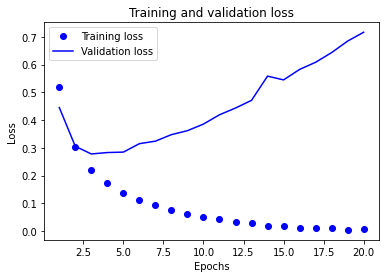

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Drawing training and verification accuracy

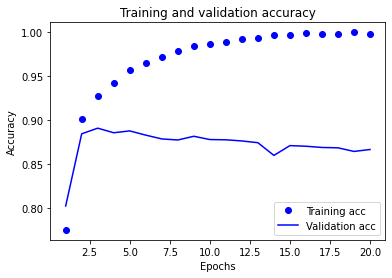

In [19]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Retraining

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.5534 - accuracy: 0.7348
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy: 0.9054
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1950 - accuracy: 0.9337
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3007 - accuracy: 0.8816


In [24]:
results

[0.30070218443870544, 0.881600022315979]